# Recap: Multiple Regression Analysis using citi bike data 

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by **`square feet`**, but a lot of other variables play a vital role: **`bedrooms`**, **`bathrooms`**, **`location`**, **`appliances`**, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called *multicollinearity*.

In [76]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics



import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf
import statsmodels.api as sm


bike_data = pd.read_csv('https://github.com/ga-students/DAT-NYC-37/raw/master/lessons/lesson-07/assets/dataset/bikeshare.csv')
bike_data.head()

%matplotlib inline

## Check 2. Multicollinearity
What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

## Students: 
using the code from the demo create a correlation heat map comparing 'temp', 'atemp', 'casual'

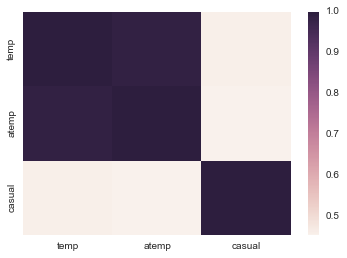

In [77]:
# Your answer

sns.heatmap(bike_data[['temp', 'atemp', 'casual']].corr())

#### Question: What did we find? 

In [78]:
# Your answer

## Intro to scikit learn

*Review the following code:*

In [79]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y):
    # Step 1:
    model = linear_model.LinearRegression()   # Specify the model
    pvals = feature_selection.f_regression(X, y)[1]  # Defining the model

    # Step 2:
    model.fit(X, y)

    residuals = (y - model.predict(X)).values

    # Step 3:
    print 'P Values:', pvals
    print 'Coefficients:', model.coef_
    print 'y-intercept:', model.intercept_
    print 'R-Squared:', model.score(X,y)
    print
    
    # keep the model
    return model

In your own words, explain what the following steps are doing in the above code:

In [80]:
# Step 1:
# Your answer here
    
# Step 2:
# Your answer here
    
# Step 3:
# Your answer here

In [81]:
# Target variable (outcome)
y = bike_data['casual']

# Possible features
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

# TODO: Compute the following for 'temp', 'atemp', and both 'temp' and 'atemp'

get_linear_model_metrics(bike_data[['atemp']], y)
get_linear_model_metrics(bike_data[['temp']], y)
get_linear_model_metrics(bike_data[['temp', 'atemp']], y)


# P Values: ?
# Coefficients: ?
# y-intercept: ?
# R-Squared: ?

P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

-0.00602088334827
-0.94184420407


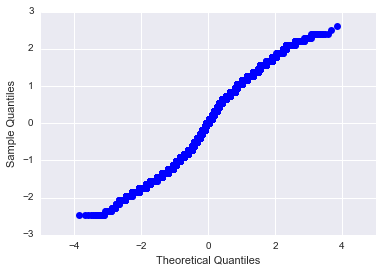

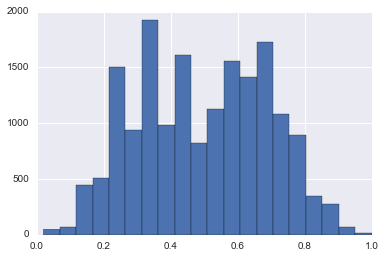

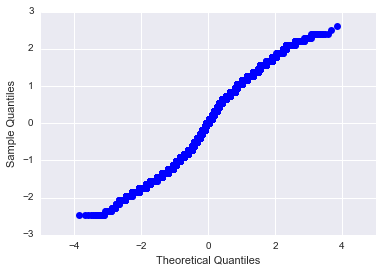

In [82]:
print bike_data['temp'].skew()
print bike_data['temp'].kurt()

bike_data['temp'].hist(bins=20)
sm.qqplot(bike_data['temp'], fit=True)

### Question: Has our model improved when using both temp, atemp?

In [43]:
# Your answer here

###  Intrepretation: 


### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?



In [ ]:
# Plot the corr matrix

In [ ]:
# Compute the following:

# P Values: ?
# Coefficients: ?
# y-intercept: ?
# R-Squared: ?

## Guided Practice: Multicollinearity with dummy variables

There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [ ]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y)

# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y)

### Similar in Statsmodels

In [ ]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

### Students: Now drop one

In [ ]:
# dropping one

### Interpretation: 
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




### Checkout our data again

In [ ]:
bike_data.dtypes

In [ ]:
bike_data.describe()